In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

2023-05-06 18:43:09.413915: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-06 18:43:09.474901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 18:43:17.924346: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [65]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
)

In [66]:
trainer = Trainer(
    diffusion,
    '../data/all-dogs-cropped/n02086240-Shih-Tzu/',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 16000,            # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = False,                       # turn on mixed precision
    calculate_fid = False,              # whether to calculate fid during training
    results_folder  = "./results_shitzu/"
)

In [86]:
trainer.load("4")

loading from version 1.5.6


In [ ]:
trainer.train()

 33%|###3      | 4000/12000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

In [80]:
def show(img):
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
    plt.show()

In [92]:
sampled_images = diffusion.sample(batch_size = 32)

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

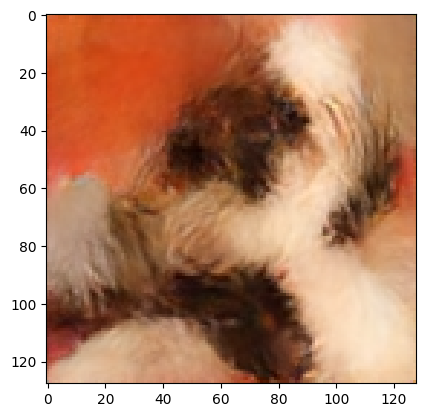

In [93]:
show(sampled_images[0])

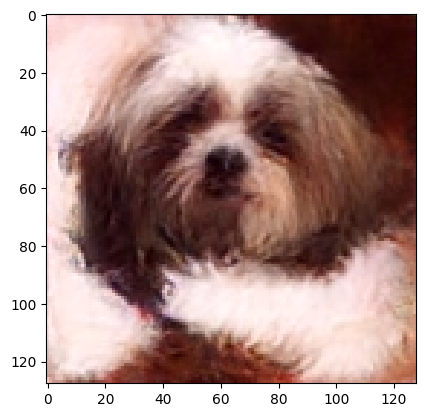

In [94]:
show(sampled_images[1])

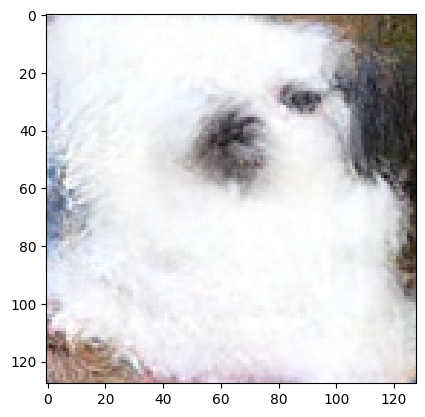

In [95]:
show(sampled_images[2])

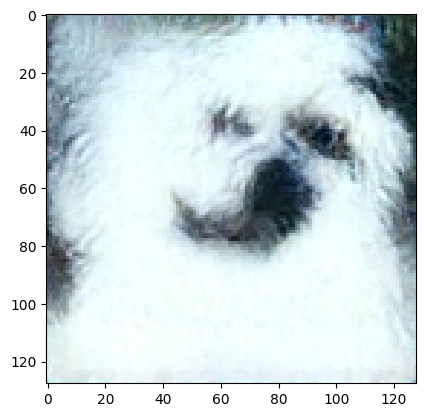

In [96]:
show(sampled_images[3])